In [21]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

In [22]:
rts = pd.read_csv("RTS.csv", sep = ';')
sp = pd.read_csv("SP.csv", sep = ';')


rts.columns = rts.columns.str.replace("<", "")
rts.columns = rts.columns.str.replace(">", "")
sp.columns = sp.columns.str.replace("<", "")
sp.columns = sp.columns.str.replace(">", "")

rts['DATE'] = pd.to_datetime(rts['DATE'], dayfirst=True) #, format='%m/%d/%Y %I:%M:%S %p')
sp['DATE'] = pd.to_datetime(sp['DATE'], dayfirst=True) #, format='%m/%d/%Y %I:%M:%S %p')
rts = rts[rts['DATE'] >= "2001-02-01"]

rts.head()

,TICKER,PER,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL
1272,RTSI,D,2001-02-01,00:00:00,172.33,172.33,170.33,170.33,16366119
1273,RTSI,D,2001-02-02,00:00:00,169.05,170.84,168.32,170.84,12911918
1274,RTSI,D,2001-02-05,00:00:00,166.89,166.98,165.37,165.37,17193143
1275,RTSI,D,2001-02-06,00:00:00,166.56,169.21,166.56,168.84,11794841
1276,RTSI,D,2001-02-07,00:00:00,168.31,168.31,165.99,166.60,14801977


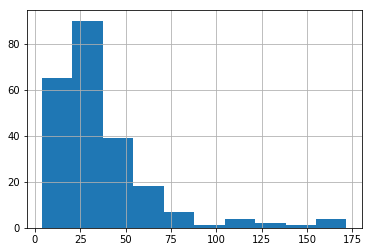

In [23]:
vola_rts = (rts.groupby([pd.Grouper(key='DATE', freq='M')])['CLOSE'].std())

vola_rts = pd.DataFrame(vola_rts)
vola_rts = vola_rts.reset_index()
vola_rts.head()
vola_rts['CL_N'] = (vola_rts['CLOSE'])/np.median(np.array(vola_rts['CLOSE']))
vola_rts.CLOSE.hist()

In [24]:
vola_rts[(vola_rts['DATE'] > '2014-01-01') & (vola_rts['DATE'] < '2015-01-01')].sort_values('CL_N').tail(30)

,DATE,CLOSE,CL_N
160,2014-06-30,23.942317,0.833915
164,2014-10-31,24.905338,0.867457
156,2014-02-28,26.752448,0.931792
165,2014-11-30,27.153434,0.945759
158,2014-04-30,31.889753,1.110726
155,2014-01-31,33.560267,1.168910
162,2014-08-31,35.760005,1.245527
163,2014-09-30,38.901070,1.354931
157,2014-03-31,41.095494,1.431363
159,2014-05-31,56.962051,1.983998


In [25]:
vola_rts['CL_N'] = (vola_rts['CLOSE'])/np.median(np.array(vola_rts['CLOSE']))
vola_rts['CL_N_S'] = np.where(vola_rts['CL_N'] >= 1, 1, 0)
vola_rts.sort_values('CLOSE')

,DATE,CLOSE,CL_N,CL_N_S
12,2002-02-28,3.890354,0.135502,0
21,2002-11-30,4.177553,0.145505,0
1,2001-03-31,5.028791,0.175154,0
2,2001-04-30,5.138777,0.178984,0
4,2001-06-30,5.657713,0.197059,0
22,2002-12-31,5.811472,0.202415,0
19,2002-09-30,6.297147,0.219331,0
6,2001-08-31,6.521156,0.227133,0
20,2002-10-31,6.872775,0.239380,0
0,2001-02-28,6.917335,0.240932,0


In [26]:
vola_rts_y = (vola_rts.groupby([pd.Grouper(key='DATE', freq='Y')])['CL_N_S'].sum())
vola_rts_y = pd.DataFrame(vola_rts_y)
vola_rts_y = vola_rts_y.reset_index()
vola_rts_y

,DATE,CL_N_S
0,2001-12-31,0
1,2002-12-31,0
2,2003-12-31,1
3,2004-12-31,1
4,2005-12-31,4
5,2006-12-31,11
6,2007-12-31,10
7,2008-12-31,12
8,2009-12-31,12
9,2010-12-31,9


In [35]:
#выбросы
vola_rts_v = vola_rts[vola_rts['CLOSE'] >= (np.percentile(vola_rts['CLOSE'].values, 75) * 1.5)].sort_values('CLOSE')
print(vola_rts_v.shape[0])
vola_rts_v.head()

25


,DATE,CLOSE,CL_N,CL_N_S
62,2006-04-30,64.227947,2.237070,1
60,2006-02-28,65.154533,2.269344,1
228,2020-02-29,66.124123,2.303115,1
84,2008-02-29,66.661481,2.321831,1
97,2009-03-31,67.328053,2.345048,1


In [28]:
np.percentile(vola_rts['CLOSE'].values, 75)

42.79394444706132

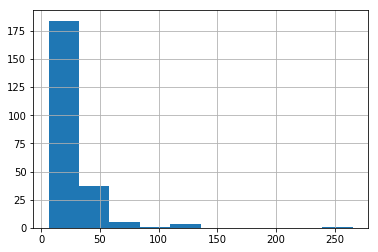

In [29]:
vola_sp = (sp.groupby([pd.Grouper(key='DATE', freq='M')])['CLOSE'].std())

vola_sp = pd.DataFrame(vola_sp)
vola_sp = vola_sp.reset_index()

vola_sp['CL_N'] = (vola_sp['CLOSE'])/np.median(np.array(vola_sp['CLOSE']))
vola_sp.sort_values('CLOSE')
vola_sp.CLOSE.hist()

In [30]:
vola_sp.sort_values('CLOSE')

,DATE,CLOSE,CL_N
58,2005-12-31,6.334536,0.325442
48,2005-02-28,6.622644,0.340243
71,2007-01-31,7.090086,0.364259
29,2003-07-31,7.387280,0.379527
196,2017-06-30,7.442742,0.382377
36,2004-02-29,7.475867,0.384078
43,2004-09-30,7.559973,0.388399
33,2003-11-30,7.904402,0.406095
40,2004-06-30,8.007328,0.411383
186,2016-08-31,8.484737,0.435910


In [31]:
print(rts['CLOSE'].values.std()/rts['CLOSE'].values.mean(), sp['CLOSE'].values.std()/sp['CLOSE'].values.mean())

0.4544162441701991 0.3869602603472455


In [32]:
vola_sp_v = vola_sp[vola_sp['CLOSE'] >= (np.percentile(vola_sp['CLOSE'].values, 75) * 1.5)].sort_values('CLOSE')
vola_sp_v.shape

(27, 3)

In [33]:
vola_rts.to_excel('RTS_vola.xlsx')
vola_sp.to_excel('SP_vola.xlsx')

In [34]:
print(np.median(np.array(vola_rts['CLOSE'])), np.median(np.array(vola_sp['CLOSE'])))

28.710740482398236 19.464433107349237
